## What Is the Dataset?

Link, explanation

## Metric and Explanation: Recall


Recall accuracy is a metric that is often used in classification tasks. It measures the proportion of positive examples that were correctly classified by the model. In other words, it measures how well the model was able to identify all of the positive examples in the dataset.

Recall accuracy is particularly useful when working with imbalanced datasets, where there are a relatively small number of positive examples compared to negative examples. In these cases, it is important to ensure that the model is able to identify as many of the positive examples as possible, even if it means that there are more false positives.

Some examples of scenarios where recall accuracy might be a useful metric include medical diagnosis, fraud detection, and spam filtering. In all of these cases, it is important to identify as many of the positive examples as possible, even if it means that there may be some false positives.

Overall, recall accuracy is a useful metric for evaluating the performance of a model when working with imbalanced datasets and when it is important to identify as many of the positive examples as possible.

## Data Separation

Stratified, Unbalanced dataset, Undersampling

In [1]:
#Categorizing given email is spam or ham
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


dataset = pd.read_csv('spamham.csv')
dataset.head() 


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [2]:
dataset.columns

Index(['text', 'spam'], dtype='object')

In [3]:
dataset.shape

(5728, 2)

In [4]:
#Checking for duplicates and removing them
dataset.drop_duplicates(inplace = True)
dataset.shape  #(5695, 2)

(5695, 2)

In [5]:
dataset

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
#Checking for any null entries in the dataset
print (pd.DataFrame(dataset.isnull().sum()))

      0
text  0
spam  0


In [7]:
#Checking class distribution
dataset.groupby('spam').count()

,text
spam,
0,4327
1,1368


In [8]:
len(dataset.text)

5695

In [9]:
import numpy as np

# display a random document and label
idx = round(np.random.rand()*len(dataset.text))
print('--------Random Document---------')
print('================================')
print('Document Label: ',[dataset.spam[idx]])
print('================================')
print("\n".join(dataset.text[idx].split("\n")))

--------Random Document---------
Document Label:  [0]
Subject: holiday gift  thank you so much for your thoughtfulness . . . . this basket is absolutely  beautiful . . . . . thanks again for your thoughtfulness and for thinking of  me . . . . . .  you have a wonderful holiday . . . . . .  kay


array([<AxesSubplot: title={'center': '0'}>,
       <AxesSubplot: title={'center': '1'}>], dtype=object)

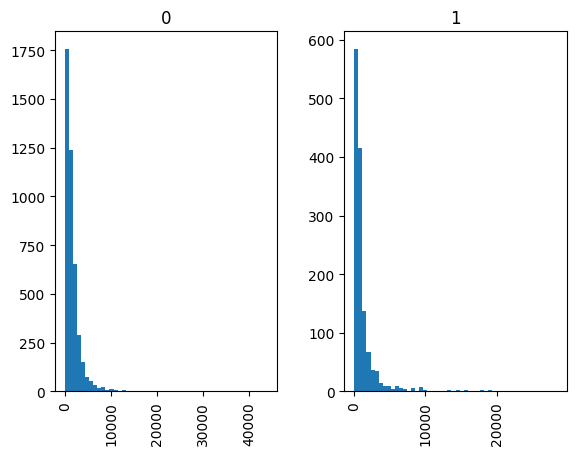

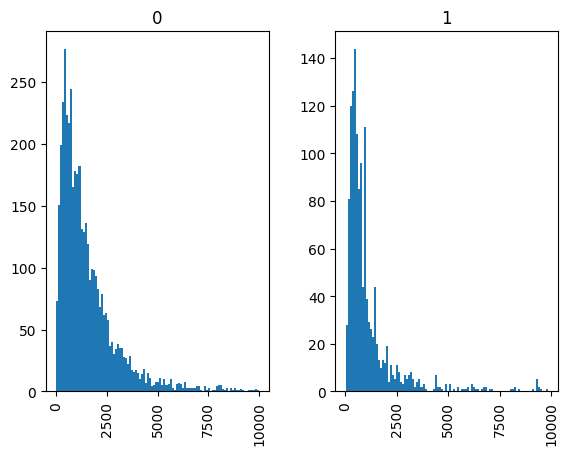

In [10]:
dataset['length'] = dataset['text'].map(lambda text: len(text))
#Let's plot histogram for length distribution by spam
dataset.hist(column='length', by='spam', bins=50)
#we can see some extreme outliers, we'll set a threshold for text length and plot the histogram again
dataset[dataset.length < 10000].hist(column='length', by='spam', bins=100)
#Using Natural Language Processing to cleaning the text to make one corpus


In [11]:
%%time
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

NUM_TOP_WORDS = None # use entire vocabulary!
MAX_ART_LEN = 250 # maximum and minimum number of words

#tokenize the text
tokenizer = Tokenizer(num_words=NUM_TOP_WORDS)
tokenizer.fit_on_texts(dataset.text)
# save as sequences with integers replacing words
sequences = tokenizer.texts_to_sequences(dataset.text)

word_index = tokenizer.word_index
NUM_TOP_WORDS = len(word_index) if NUM_TOP_WORDS==None else NUM_TOP_WORDS
top_words = min((len(word_index),NUM_TOP_WORDS))
print('Found %s unique tokens. Distilled to %d top words.' % (len(word_index),top_words))

X = pad_sequences(sequences, maxlen=MAX_ART_LEN)

y_ohe = dataset.spam
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y_ohe.shape)
print(np.max(X))

Found 37353 unique tokens. Distilled to 37353 top words.
Shape of data tensor: (5695, 250)
Shape of label tensor: (5695,)
37353
CPU times: user 3.14 s, sys: 716 ms, total: 3.86 s
Wall time: 3.27 s


Is any y value is NaN: False


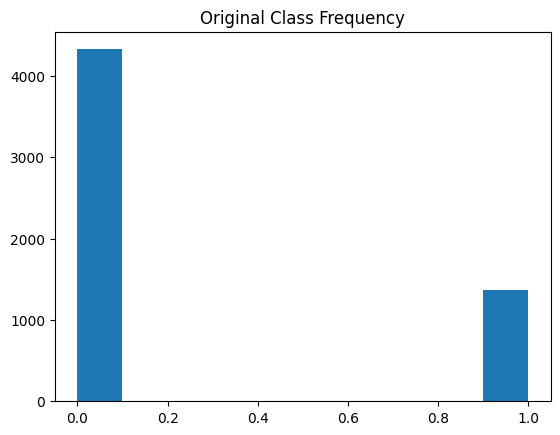

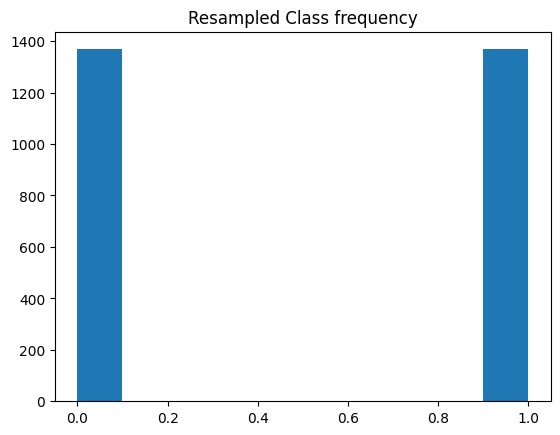

In [12]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Use undersampling to make every 
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y_ohe)
print(f'Is any y value is NaN: {np.isnan(y_ohe).any()}')

plt.hist(y_ohe)
plt.title("Original Class Frequency")
plt.show()

plt.hist(y_resampled)
plt.title("Resampled Class frequency")
plt.show()



X_train Shape: (2188, 250) Label Shape: (2188,)


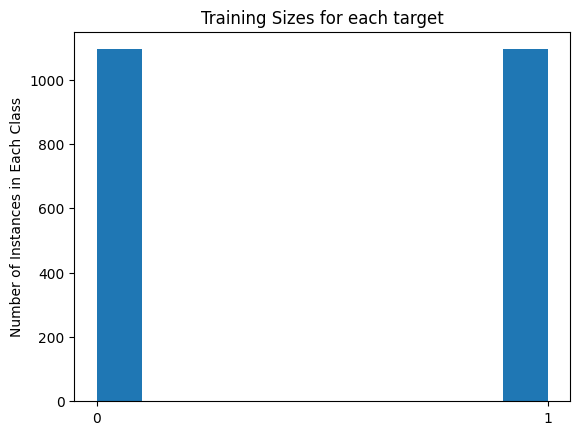

In [13]:
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
from matplotlib import pyplot as plt
%matplotlib inline

# Split it into train / test subsets
X_train, X_test, y_train_ohe, y_test_ohe = train_test_split(X_resampled, y_resampled, test_size=0.2,
                                                            stratify=y_resampled,
                                                            random_state=42)
NUM_CLASSES = 1

# print some stats of the data
print("X_train Shape:",X_train.shape, "Label Shape:", y_train_ohe.shape)
uniq_classes = np.sum(y_train_ohe,axis=0)
plt.hist(y_train_ohe)
plt.ylabel("Number of Instances in Each Class")

new_list = range(math.floor(min(y_test_ohe)), math.ceil(max(y_test_ohe))+1)
plt.xticks(new_list)
plt.title("Training Sizes for each target")


plt.show()


Text(0, 0.5, 'Number of Instances in Each Class')

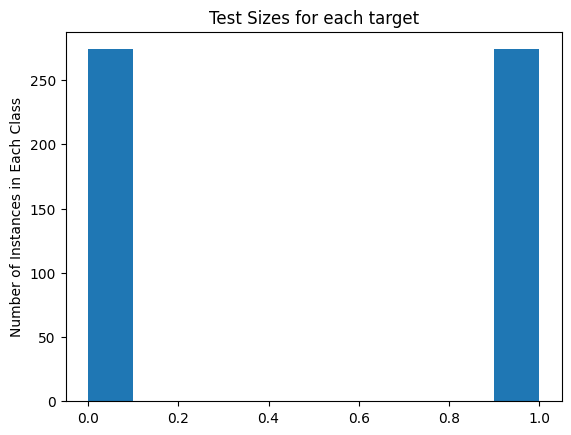

In [14]:
uniq_classes = np.sum(y_test_ohe,axis=0)
plt.hist(y_test_ohe)
plt.title("Test Sizes for each target")
plt.ylabel("Number of Instances in Each Class")


## Models

### Simple RNN Model

In [16]:
# show example without the FOR loop
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, SimpleRNN
from tensorflow.keras.layers import Embedding

EMBED_SIZE = 50
RNN_STATESIZE = 100
rnns = []
input_holder = Input(shape=(X_train.shape[1], ))
shared_embed = Embedding(top_words, # input dimension (max int of OHE)
                EMBED_SIZE, # output dimension size
                input_length=MAX_ART_LEN)(input_holder) # number of words in each sequence


x = SimpleRNN(RNN_STATESIZE, dropout=0.2, recurrent_dropout=0.2)(shared_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
simple_rnn_model = Model(inputs=input_holder,outputs=x)

Metal device set to: Apple M1 Pro


2022-12-13 23:30:28.143900: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-13 23:30:28.144727: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Create first LSTM and GRU Models. Compile Simple RNN, LSTM and GRU 

Please note that these values are tuned after checking the validation/training accuracy. Best models are used.

In [17]:
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import tensorflow as tf

# create LSTM
x = LSTM(RNN_STATESIZE, dropout=0.2, recurrent_dropout=0.2)(shared_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
lstm_model = Model(inputs=input_holder,outputs=x)

# create GRU
x = GRU(RNN_STATESIZE, dropout=0.2, recurrent_dropout=0.2)(shared_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
gru_model = Model(inputs=input_holder,outputs=x)

# lr_schedule = ExponentialDecay(
#     initial_learning_rate=0.1,
#     decay_steps=10000,
#     decay_rate=0.95) 

opt = Adam(lr=0.0001, epsilon=0.00005, clipnorm=1.0)

simple_rnn_model.compile(loss='binary_crossentropy', 
              optimizer= opt, 
              metrics=[tf.keras.metrics.Recall()])

lstm_model.compile(loss='binary_crossentropy', 
              optimizer= opt, 
              metrics=[tf.keras.metrics.Recall()])

gru_model.compile(loss='binary_crossentropy', 
              optimizer= opt, 
              metrics=[tf.keras.metrics.Recall()])

print(simple_rnn_model.summary())
print(lstm_model.summary())
print(gru_model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250)]             0         
                                                                 
 embedding (Embedding)       (None, 250, 50)           1867650   
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               15100     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,882,851
Trainable params: 1,882,851
Non-trainable params: 0
_________________________________________________________________
None
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        

/Users/ycd17/miniforge3/envs/tf/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Fit the first LSTM Model (MODEL 1)

In [19]:
import time

In [20]:
start_time = time.time()

with tf.device("/cpu:0"):
    history_lstm=lstm_model.fit(X_train, y_train_ohe, epochs=8, batch_size=32, validation_data=(X_test, y_test_ohe))
    
end_time = time.time()

elapsed_time_LSTM1 = end_time - start_time

Epoch 1/8


2022-12-13 23:40:06.887350: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-13 23:40:07.767825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - ETA: 0s - loss: 0.6924 - recall_1: 0.7322

2022-12-13 23:40:27.183325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 23s 313ms/step - loss: 0.6924 - recall_1: 0.7322 - val_loss: 0.6914 - val_recall_1: 0.7555
Epoch 2/8
69/69 [==============================] - 21s 306ms/step - loss: 0.6899 - recall_1: 0.8757 - val_loss: 0.6880 - val_recall_1: 0.7847
Epoch 3/8
69/69 [==============================] - 21s 308ms/step - loss: 0.6833 - recall_1: 0.8492 - val_loss: 0.6760 - val_recall_1: 0.8431
Epoch 4/8
69/69 [==============================] - 21s 312ms/step - loss: 0.5644 - recall_1: 0.8729 - val_loss: 0.3801 - val_recall_1: 0.9672
Epoch 5/8
69/69 [==============================] - 25s 364ms/step - loss: 0.2961 - recall_1: 0.9452 - val_loss: 0.2405 - val_recall_1: 0.9745
Epoch 6/8
69/69 [==============================] - 22s 326ms/step - loss: 0.1782 - recall_1: 0.9625 - val_loss: 0.1777 - val_recall_1: 0.9562
Epoch 7/8
69/69 [==============================] - 23s 334ms/step - loss: 0.1135 - recall_1: 0.9863 - val_loss: 0.1893 - val_recall_1: 0.9781
Epoch 8/8
69/69 

In [22]:
print("Elapsed time:", elapsed_time_LSTM1, 'seconds')

Elapsed time: 179.8201551437378 seconds


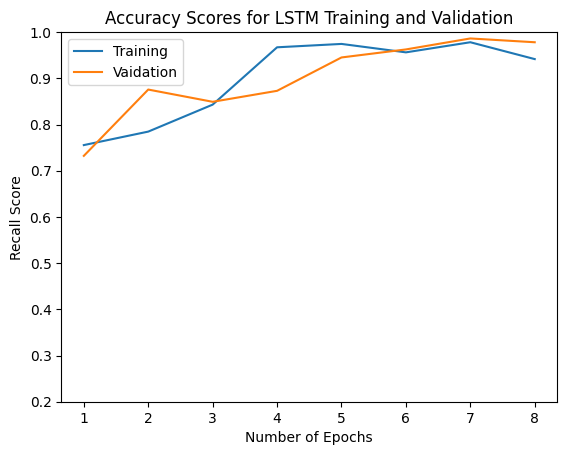

In [50]:
import matplotlib.pyplot as plt
lstm_acc_training=history_lstm.history['recall_1']
lstm_acc=history_lstm.history['val_recall_1']
epoch=[1,2,3,4,5,6,7,8]
plt.plot(epoch,lstm_acc)
plt.plot(epoch,lstm_acc_training)
plt.title('Accuracy Scores for LSTM Training and Validation')
plt.ylim([0.2, 1])
plt.ylim([0.2, 1])
plt.ylim([0.2, 1])
plt.xlabel('Number of Epochs')
plt.ylabel('Recall Score')
#new_list = range(math.floor(0, 6)
plt.xticks([1,2,3,4,5,6,7,8])
plt.legend(["Training", "Vaidation"])

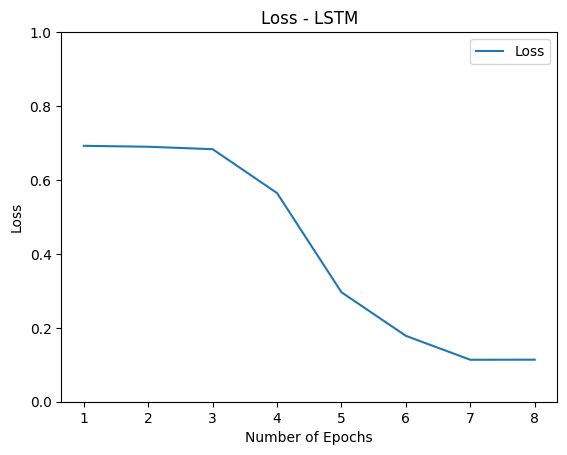

In [52]:
import matplotlib.pyplot as plt
lstm_loss=history_lstm.history['loss']
epoch=[1,2,3,4,5,6,7,8]
plt.plot(epoch,lstm_loss)
plt.title('Loss - LSTM')
plt.ylim([0, 1])
plt.ylim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
#new_list = range(math.floor(0, 6)
plt.xticks([1,2,3,4,5,6,7,8])
plt.legend(["Loss"])

### Fit first GRU model (MODEL 2)

In [23]:
start_time = time.time()

with tf.device("/cpu:0"):
    history_gru=gru_model.fit(X_train, y_train_ohe, epochs=8, batch_size=32, validation_data=(X_test, y_test_ohe))    

    end_time = time.time()

elapsed_time_GRU1 = end_time - start_time
print("Elapsed time:", elapsed_time_GRU1, 'seconds')

Epoch 1/8


2022-12-13 23:47:44.482979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - ETA: 0s - loss: 0.6782 - recall_2: 0.6161

2022-12-13 23:48:02.626399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 21s 290ms/step - loss: 0.6782 - recall_2: 0.6161 - val_loss: 0.6559 - val_recall_2: 0.8942
Epoch 2/8
69/69 [==============================] - 20s 285ms/step - loss: 0.5395 - recall_2: 0.8775 - val_loss: 0.1453 - val_recall_2: 0.9708
Epoch 3/8
69/69 [==============================] - 21s 302ms/step - loss: 0.1181 - recall_2: 0.9744 - val_loss: 0.0865 - val_recall_2: 0.9781
Epoch 4/8
69/69 [==============================] - 21s 302ms/step - loss: 0.0561 - recall_2: 0.9918 - val_loss: 0.0876 - val_recall_2: 0.9854
Epoch 5/8
69/69 [==============================] - 21s 302ms/step - loss: 0.0411 - recall_2: 0.9909 - val_loss: 0.0847 - val_recall_2: 0.9562
Epoch 6/8
69/69 [==============================] - 21s 308ms/step - loss: 0.0370 - recall_2: 0.9918 - val_loss: 0.0654 - val_recall_2: 0.9672
Epoch 7/8
69/69 [==============================] - 23s 334ms/step - loss: 0.0275 - recall_2: 0.9954 - val_loss: 0.0443 - val_recall_2: 0.9708
Epoch 8/8
69/69 

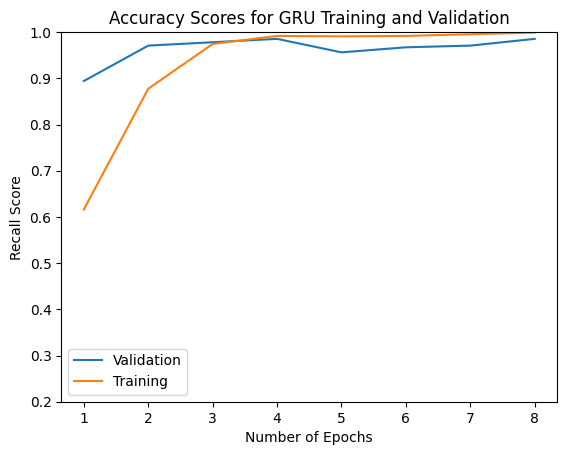

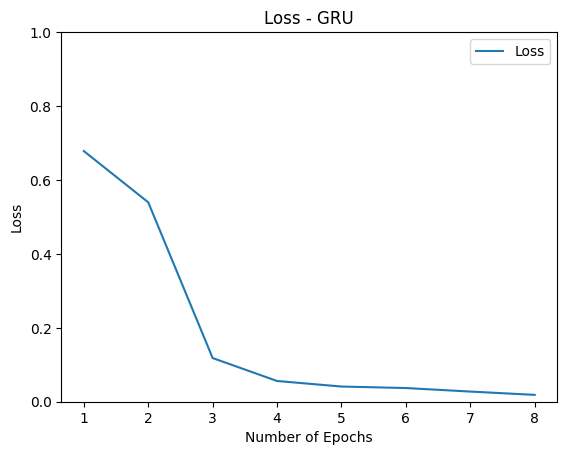

In [60]:
import matplotlib.pyplot as plt
gru_acc_training=history_gru.history['recall_2']
gru_acc=history_gru.history['val_recall_2']
epoch=[1,2,3,4,5,6,7,8]
plt.plot(epoch,gru_acc)
plt.plot(epoch,gru_acc_training)
plt.title('Accuracy Scores for GRU Training and Validation')
plt.ylim([0.2, 1])
plt.ylim([0.2, 1])
plt.ylim([0.2, 1])
plt.xlabel('Number of Epochs')
plt.ylabel('Recall Score')
#new_list = range(math.floor(0, 6)
plt.xticks([1,2,3,4,5,6,7,8])
plt.legend(["Validation", "Training"])
plt.show()


import matplotlib.pyplot as plt
gru_loss=history_gru.history['loss']
epoch=[1,2,3,4,5,6,7,8]
plt.plot(epoch,gru_loss)
plt.title('Loss - GRU')
plt.ylim([0, 1])
plt.ylim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
#new_list = range(math.floor(0, 6)
plt.xticks([1,2,3,4,5,6,7,8])
plt.legend(["Loss"])
plt.show()

### Fit the Simple RRN (Model 3) 

In [24]:
start_time = time.time()

with tf.device("/cpu:0"):
    history_simple_rnn=simple_rnn_model.fit(X_train, y_train_ohe, epochs=8, batch_size=32, validation_data=(X_test, y_test_ohe))    

    end_time = time.time()

elapsed_time_simple_RNN = end_time - start_time
print("Elapsed time:", elapsed_time_simple_RNN, 'seconds')

Epoch 1/8


2022-12-13 23:57:59.043018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - ETA: 0s - loss: 0.7085 - recall: 0.5229

2022-12-13 23:58:08.398368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 11s 154ms/step - loss: 0.7085 - recall: 0.5229 - val_loss: 0.6823 - val_recall: 0.5547
Epoch 2/8
69/69 [==============================] - 11s 165ms/step - loss: 0.6898 - recall: 0.5795 - val_loss: 0.6586 - val_recall: 0.7372
Epoch 3/8
69/69 [==============================] - 11s 153ms/step - loss: 0.6761 - recall: 0.5740 - val_loss: 0.6413 - val_recall: 0.7810
Epoch 4/8
69/69 [==============================] - 11s 159ms/step - loss: 0.6548 - recall: 0.6298 - val_loss: 0.6142 - val_recall: 0.9051
Epoch 5/8
69/69 [==============================] - 10s 151ms/step - loss: 0.6391 - recall: 0.6490 - val_loss: 0.5820 - val_recall: 0.9380
Epoch 6/8
69/69 [==============================] - 10s 152ms/step - loss: 0.6089 - recall: 0.6837 - val_loss: 0.5411 - val_recall: 0.9380
Epoch 7/8
69/69 [==============================] - 11s 157ms/step - loss: 0.5962 - recall: 0.7139 - val_loss: 0.4517 - val_recall: 0.9197
Epoch 8/8
69/69 [===========================

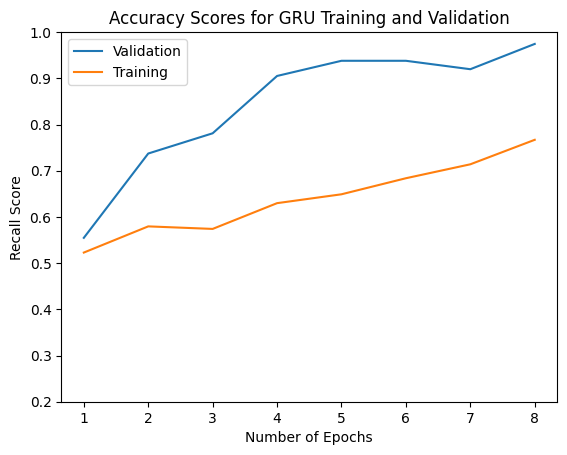

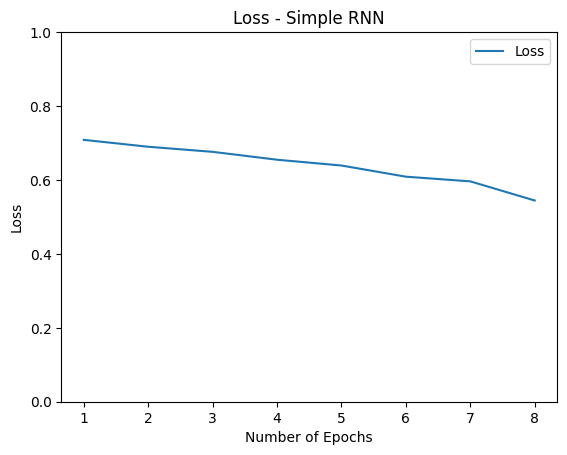

In [61]:
import matplotlib.pyplot as plt
simple_acc_training=history_simple_rnn.history['recall']
simple_acc=history_simple_rnn.history['val_recall']
epoch=[1,2,3,4,5,6,7,8]
plt.plot(epoch,simple_acc)
plt.plot(epoch,simple_acc_training)
plt.title('Accuracy Scores for GRU Training and Validation')
plt.ylim([0.2, 1])
plt.ylim([0.2, 1])
plt.ylim([0.2, 1])
plt.xlabel('Number of Epochs')
plt.ylabel('Recall Score')
#new_list = range(math.floor(0, 6)
plt.xticks([1,2,3,4,5,6,7,8])
plt.legend(["Validation", "Training"])
plt.show()


import matplotlib.pyplot as plt
simple_loss=history_simple_rnn.history['loss']
epoch=[1,2,3,4,5,6,7,8]
plt.plot(epoch,simple_loss)
plt.title('Loss - Simple RNN')
plt.ylim([0, 1])
plt.ylim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
#new_list = range(math.floor(0, 6)
plt.xticks([1,2,3,4,5,6,7,8])
plt.legend(["Loss"])
plt.show()

## Comparing first three models:

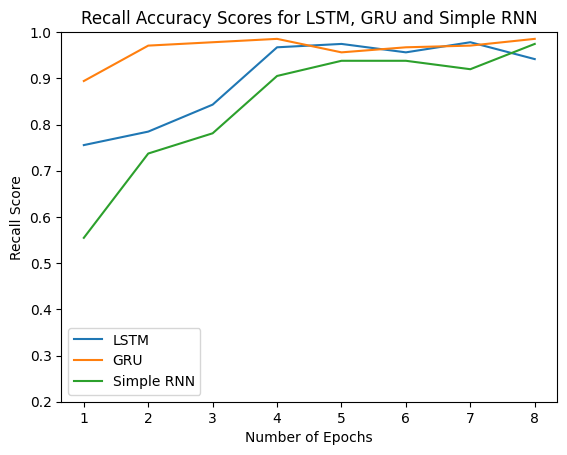

In [63]:
import matplotlib.pyplot as plt
gru_acc=history_gru.history['val_recall_2']
lstm_acc=history_lstm.history['val_recall_1']
simple_rnn_acc=history_simple_rnn.history['val_recall']
epoch=[1,2,3,4,5,6,7,8]
plt.plot(epoch,lstm_acc)
plt.plot(epoch,gru_acc)
plt.plot(epoch,simple_rnn_acc)
plt.title('Recall Accuracy Scores for LSTM, GRU and Simple RNN')
plt.ylim([0.2, 1])
plt.ylim([0.2, 1])
plt.ylim([0.2, 1])
plt.xlabel('Number of Epochs')
plt.ylabel('Recall Score')
#new_list = range(math.floor(0, 6)
plt.xticks([1,2,3,4,5,6,7,8])
plt.legend(["LSTM", "GRU", "Simple RNN"])

### Modified GRU Model (Model 4)

Hyperparameter Tuning

In [26]:
x = GRU(RNN_STATESIZE, dropout=0.3, recurrent_dropout=0.3)(shared_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
gru_model_modified = Model(inputs=input_holder,outputs=x)


opt2 = Adam(lr=0.001, epsilon=0.00005, clipnorm=0.5)

gru_model_modified.compile(loss='binary_crossentropy', 
              optimizer= opt2, 
              metrics=[tf.keras.metrics.Recall()])

print(gru_model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250)]             0         
                                                                 
 embedding (Embedding)       (None, 250, 50)           1867650   
                                                                 
 gru (GRU)                   (None, 100)               45600     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,913,351
Trainable params: 1,913,351
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
start_time = time.time()

with tf.device("/cpu:0"):
    history_GRU_modified=gru_model_modified.fit(X_train, y_train_ohe, epochs=8, batch_size=64, validation_data=(X_test, y_test_ohe))    

    end_time = time.time()

elapsed_time_GRU_modified = end_time - start_time
print("Elapsed time:", elapsed_time_GRU_modified, 'seconds')

Epoch 1/8


2022-12-14 00:11:50.668419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - ETA: 0s - loss: 0.6251 - recall_3: 0.9232

2022-12-14 00:12:01.737934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 13s 339ms/step - loss: 0.6251 - recall_3: 0.9232 - val_loss: 0.5108 - val_recall_3: 0.8723
Epoch 2/8
35/35 [==============================] - 12s 358ms/step - loss: 0.5314 - recall_3: 0.8473 - val_loss: 0.1890 - val_recall_3: 0.8650
Epoch 3/8
35/35 [==============================] - 13s 358ms/step - loss: 0.0554 - recall_3: 0.9835 - val_loss: 0.0771 - val_recall_3: 0.9526
Epoch 4/8
35/35 [==============================] - 13s 360ms/step - loss: 0.0230 - recall_3: 0.9954 - val_loss: 0.1247 - val_recall_3: 0.9234
Epoch 5/8
35/35 [==============================] - 12s 349ms/step - loss: 0.0219 - recall_3: 0.9973 - val_loss: 0.0596 - val_recall_3: 0.9745
Epoch 6/8
35/35 [==============================] - 13s 375ms/step - loss: 0.0099 - recall_3: 0.9982 - val_loss: 0.0533 - val_recall_3: 0.9891
Epoch 7/8
35/35 [==============================] - 15s 428ms/step - loss: 0.0069 - recall_3: 0.9991 - val_loss: 0.0473 - val_recall_3: 0.9891
Epoch 8/8
35/35 

### Modified GRU (Model 5)

In [67]:
x = GRU(RNN_STATESIZE, dropout=0.4, recurrent_dropout=0.4)(shared_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
gru_model_modified2 = Model(inputs=input_holder,outputs=x)


opt3 = Adam(lr=0.001, epsilon=0.000001, clipnorm=0.5)

gru_model_modified2.compile(loss='binary_crossentropy', 
              optimizer= opt3, 
              metrics=[tf.keras.metrics.Recall()])

print(gru_model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250)]             0         
                                                                 
 embedding (Embedding)       (None, 250, 50)           1867650   
                                                                 
 gru (GRU)                   (None, 100)               45600     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,913,351
Trainable params: 1,913,351
Non-trainable params: 0
_________________________________________________________________
None


/Users/ycd17/miniforge3/envs/tf/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [68]:
start_time = time.time()

with tf.device("/cpu:0"):
    history_GRU_modified2=gru_model_modified2.fit(X_train, y_train_ohe, epochs=8, batch_size=64, validation_data=(X_test, y_test_ohe))    

    end_time = time.time()

elapsed_time_GRU_modified2 = end_time - start_time
print("Elapsed time:", elapsed_time_GRU_modified, 'seconds')

Epoch 1/8


2022-12-14 09:57:40.095020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - ETA: 0s - loss: 0.3603 - recall_10: 0.9552

2022-12-14 09:57:51.923985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 14s 362ms/step - loss: 0.3603 - recall_10: 0.9552 - val_loss: 0.0630 - val_recall_10: 0.9745
Epoch 2/8
35/35 [==============================] - 12s 353ms/step - loss: 0.0086 - recall_10: 0.9991 - val_loss: 0.1040 - val_recall_10: 0.9416
Epoch 3/8
35/35 [==============================] - 12s 357ms/step - loss: 0.0071 - recall_10: 0.9982 - val_loss: 0.0802 - val_recall_10: 0.9672
Epoch 4/8
35/35 [==============================] - 12s 355ms/step - loss: 0.0045 - recall_10: 0.9991 - val_loss: 0.0771 - val_recall_10: 0.9891
Epoch 5/8
35/35 [==============================] - 12s 356ms/step - loss: 0.0016 - recall_10: 1.0000 - val_loss: 0.1027 - val_recall_10: 0.9453
Epoch 6/8
35/35 [==============================] - 13s 364ms/step - loss: 0.0026 - recall_10: 0.9991 - val_loss: 0.0895 - val_recall_10: 0.9854
Epoch 7/8
35/35 [==============================] - 13s 369ms/step - loss: 0.0040 - recall_10: 0.9991 - val_loss: 0.0784 - val_recall_10: 0.9635
Ep

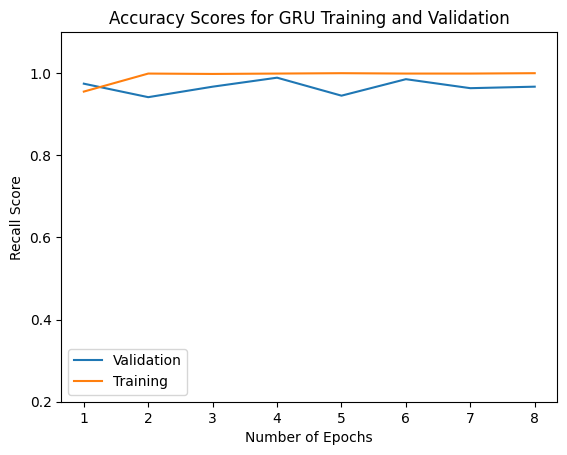

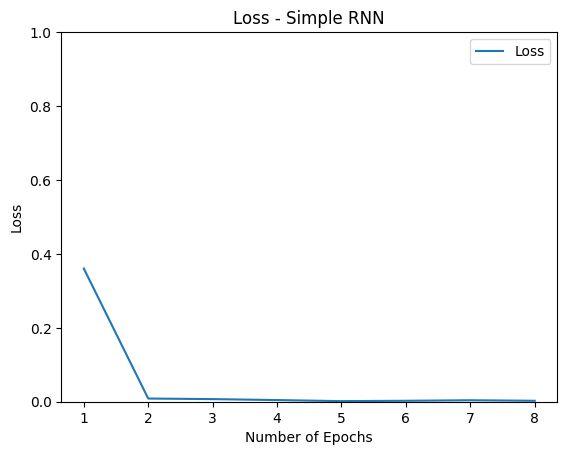

In [71]:
import matplotlib.pyplot as plt
gru_acc_training2=history_GRU_modified2.history['recall_10']
gru_acc_2=history_GRU_modified2.history['val_recall_10']
epoch=[1,2,3,4,5,6,7,8]
plt.plot(epoch,gru_acc_2)
plt.plot(epoch,gru_acc_training2)
plt.title('Accuracy Scores for GRU Training and Validation')
plt.ylim([0.2, 1.1])
plt.ylim([0.2, 1.1])
plt.ylim([0.2, 1.1])
plt.xlabel('Number of Epochs')
plt.ylabel('Recall Score')
#new_list = range(math.floor(0, 6)
plt.xticks([1,2,3,4,5,6,7,8])
plt.legend(["Validation", "Training"])
plt.show()


gru_loss_2=history_GRU_modified2.history['loss']
epoch=[1,2,3,4,5,6,7,8]
plt.plot(epoch,gru_loss_2)
plt.title('Loss - Simple RNN')
plt.ylim([0, 1])
plt.ylim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
#new_list = range(math.floor(0, 6)
plt.xticks([1,2,3,4,5,6,7,8])
plt.legend(["Loss"])
plt.show()

### Modified GRU (Model 6)

In [72]:
x = GRU(RNN_STATESIZE, dropout=0.4, recurrent_dropout=0.4)(shared_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
gru_model_modified3 = Model(inputs=input_holder,outputs=x)


opt4 = Adam(lr=0.0001, epsilon=0.000001, clipnorm=0.5)

gru_model_modified3.compile(loss='binary_crossentropy', 
              optimizer= opt4, 
              metrics=[tf.keras.metrics.Recall()])

print(gru_model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250)]             0         
                                                                 
 embedding (Embedding)       (None, 250, 50)           1867650   
                                                                 
 gru (GRU)                   (None, 100)               45600     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,913,351
Trainable params: 1,913,351
Non-trainable params: 0
_________________________________________________________________
None


In [73]:
start_time = time.time()

with tf.device("/cpu:0"):
    history_GRU_modified3=gru_model_modified3.fit(X_train, y_train_ohe, epochs=8, batch_size=64, validation_data=(X_test, y_test_ohe))    

    end_time = time.time()

elapsed_time_GRU_modified3 = end_time - start_time
print("Elapsed time:", elapsed_time_GRU_modified3, 'seconds')

Epoch 1/8


2022-12-14 10:01:55.670160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - ETA: 0s - loss: 0.6618 - recall_11: 0.8318

2022-12-14 10:02:07.202955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 13s 356ms/step - loss: 0.6618 - recall_11: 0.8318 - val_loss: 0.6324 - val_recall_11: 0.8686
Epoch 2/8
35/35 [==============================] - 12s 347ms/step - loss: 0.5845 - recall_11: 0.9826 - val_loss: 0.5636 - val_recall_11: 0.8942
Epoch 3/8
35/35 [==============================] - 12s 346ms/step - loss: 0.4890 - recall_11: 0.9918 - val_loss: 0.4652 - val_recall_11: 0.9380
Epoch 4/8
35/35 [==============================] - 12s 348ms/step - loss: 0.3269 - recall_11: 0.9982 - val_loss: 0.2467 - val_recall_11: 0.9745
Epoch 5/8
35/35 [==============================] - 13s 361ms/step - loss: 0.0727 - recall_11: 1.0000 - val_loss: 0.0990 - val_recall_11: 0.9416
Epoch 6/8
35/35 [==============================] - 13s 364ms/step - loss: 0.0211 - recall_11: 0.9991 - val_loss: 0.0600 - val_recall_11: 0.9781
Epoch 7/8
35/35 [==============================] - 13s 367ms/step - loss: 0.0128 - recall_11: 0.9991 - val_loss: 0.0495 - val_recall_11: 0.9927
Ep

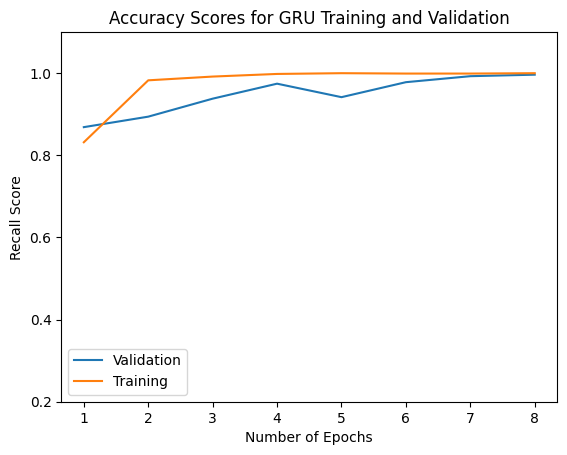

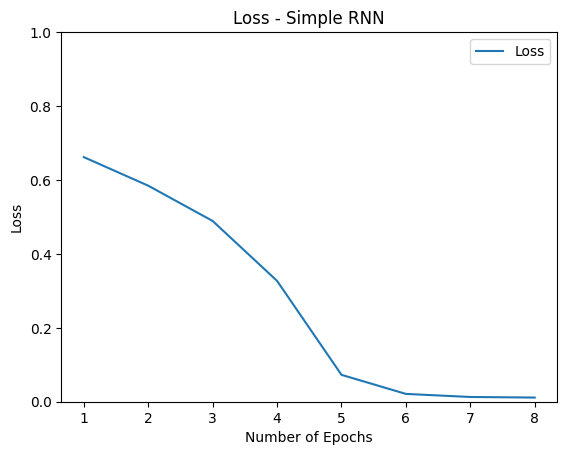

In [74]:
import matplotlib.pyplot as plt
gru_acc_training3=history_GRU_modified3.history['recall_11']
gru_acc_3=history_GRU_modified3.history['val_recall_11']
epoch=[1,2,3,4,5,6,7,8]
plt.plot(epoch,gru_acc_3)
plt.plot(epoch,gru_acc_training3)
plt.title('Accuracy Scores for GRU Training and Validation')
plt.ylim([0.2, 1.1])
plt.ylim([0.2, 1.1])
plt.ylim([0.2, 1.1])
plt.xlabel('Number of Epochs')
plt.ylabel('Recall Score')
#new_list = range(math.floor(0, 6)
plt.xticks([1,2,3,4,5,6,7,8])
plt.legend(["Validation", "Training"])
plt.show()


gru_loss_3=history_GRU_modified3.history['loss']
epoch=[1,2,3,4,5,6,7,8]
plt.plot(epoch,gru_loss_3)
plt.title('Loss - Simple RNN')
plt.ylim([0, 1])
plt.ylim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
#new_list = range(math.floor(0, 6)
plt.xticks([1,2,3,4,5,6,7,8])
plt.legend(["Loss"])
plt.show()

# SECOND LAYER GRU

A second chain, or "layer," in a recurrent neural network (RNN) model is often used when the model needs to process and analyze more complex or hierarchical data. For example, if the data includes sequences of sequences, or if the data has a multi-level structure, adding a second layer to the RNN can help the model to capture and represent this complexity.

In addition to dealing with complex data, a second layer in an RNN can also improve the performance and accuracy of the model. This is because the second layer allows the model to learn and extract more abstract and higher-level features from the data, which can help the model to make more accurate predictions.

Overall, adding a second layer to an RNN can be useful in a variety of situations. It can help the model to handle complex and hierarchical data, and can also improve the performance and accuracy of the model. Whether or not to add a second layer to an RNN will depend on the specific dataset and the goals of the analysis.

In [32]:
# Import the Concatenate layer from Keras
from keras.layers import Concatenate

x = GRU(RNN_STATESIZE, dropout=0.2, recurrent_dropout=0.2)(shared_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)

# Add the second GRU layer
x2 = GRU(RNN_STATESIZE, dropout=0.2, recurrent_dropout=0.2)(shared_embed)

# Concatenate the outputs of the first and second GRU layers
x = Concatenate()([x, x2])

# Add the final dense layer
x = Dense(NUM_CLASSES, activation='sigmoid')(x)

# Create the model
gru_model_2 = Model(inputs=input_holder,outputs=x)

gru_model_2.compile(loss='binary_crossentropy',
              optimizer= opt,
              metrics=[tf.keras.metrics.Recall()])

print(gru_model_2.summary())

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 250, 50)      1867650     ['input_1[0][0]']                
                                                                                                  
 gru_4 (GRU)                    (None, 100)          45600       ['embedding[0][0]']              
                                                                                                  
 dense_6 (Dense)                (None, 1)            101         ['gru_4[0][0]']                  
                                                                                            

In [33]:
start_time = time.time()

with tf.device("/cpu:0"):
    history_gru_2=gru_model_2.fit(X_train, y_train_ohe, epochs=8, batch_size=32, validation_data=(X_test, y_test_ohe))

end_time = time.time()

elapsed_time_GRU_model2 = end_time - start_time
print("Elapsed time:", elapsed_time_GRU_model2, 'seconds')

Epoch 1/8


2022-12-14 00:35:46.557368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - ETA: 0s - loss: 0.4093 - recall_6: 0.8291

2022-12-14 00:36:13.781564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 33s 447ms/step - loss: 0.4093 - recall_6: 0.8291 - val_loss: 0.0962 - val_recall_6: 0.9234
Epoch 2/8
69/69 [==============================] - 35s 511ms/step - loss: 0.0089 - recall_6: 0.9991 - val_loss: 0.0342 - val_recall_6: 0.9927
Epoch 3/8
69/69 [==============================] - 37s 534ms/step - loss: 0.0052 - recall_6: 1.0000 - val_loss: 0.0328 - val_recall_6: 0.9891
Epoch 4/8
69/69 [==============================] - 38s 556ms/step - loss: 0.0053 - recall_6: 1.0000 - val_loss: 0.0455 - val_recall_6: 0.9927
Epoch 5/8
69/69 [==============================] - 36s 526ms/step - loss: 0.0035 - recall_6: 1.0000 - val_loss: 0.0389 - val_recall_6: 0.9927
Epoch 6/8
69/69 [==============================] - 36s 518ms/step - loss: 0.0025 - recall_6: 1.0000 - val_loss: 0.0535 - val_recall_6: 0.9964
Epoch 7/8
69/69 [==============================] - 36s 517ms/step - loss: 0.0034 - recall_6: 0.9991 - val_loss: 0.0358 - val_recall_6: 0.9927
Epoch 8/8
69/69 

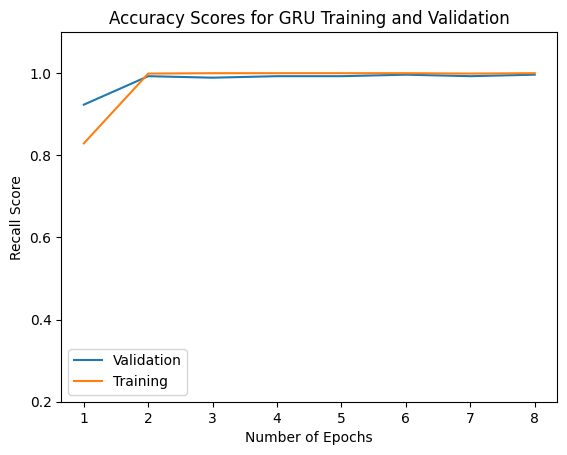

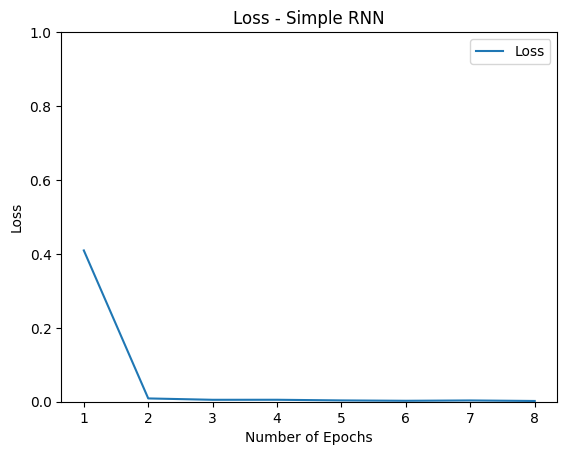

In [75]:
import matplotlib.pyplot as plt
gru_acc_training_model2=history_gru_2.history['recall_6']
gru_acc_model2=history_gru_2.history['val_recall_6']
epoch=[1,2,3,4,5,6,7,8]
plt.plot(epoch,gru_acc_model2)
plt.plot(epoch,gru_acc_training_model2)
plt.title('Accuracy Scores for GRU Training and Validation')
plt.ylim([0.2, 1.1])
plt.ylim([0.2, 1.1])
plt.ylim([0.2, 1.1])
plt.xlabel('Number of Epochs')
plt.ylabel('Recall Score')
#new_list = range(math.floor(0, 6)
plt.xticks([1,2,3,4,5,6,7,8])
plt.legend(["Validation", "Training"])
plt.show()


gru_loss_model2=history_gru_2.history['loss']
epoch=[1,2,3,4,5,6,7,8]
plt.plot(epoch,gru_loss_model2)
plt.title('Loss - Simple RNN')
plt.ylim([0, 1])
plt.ylim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
#new_list = range(math.floor(0, 6)
plt.xticks([1,2,3,4,5,6,7,8])
plt.legend(["Loss"])
plt.show()

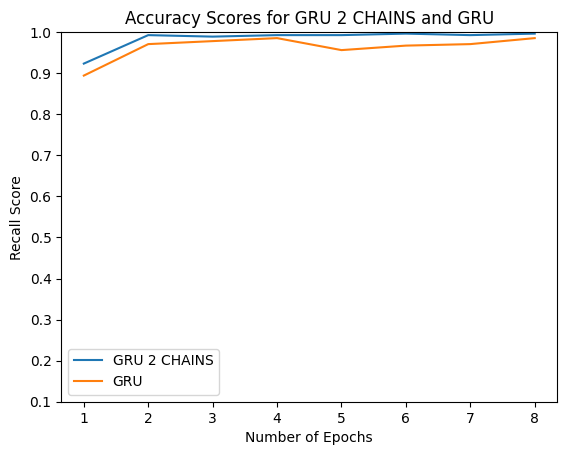

In [76]:
import matplotlib.pyplot as plt
gru_acc=history_gru.history['val_recall_2']
gru2_acc=history_gru_2.history['val_recall_6']
epoch=[1,2,3,4,5,6,7,8]
plt.plot(epoch,gru2_acc)
plt.plot(epoch,gru_acc)
plt.title('Accuracy Scores for GRU 2 CHAINS and GRU')
plt.ylim([0.1, 1])
plt.ylim([0.1, 1])
plt.ylim([0.1, 1])
plt.xlabel('Number of Epochs')
plt.ylabel('Recall Score')
#new_list = range(math.floor(0, 6)
plt.xticks([1,2,3,4,5,6,7,8])
plt.legend(["GRU 2 CHAINS", "GRU"])

# loss cizdir
computation time

## Exceptional Work

### GLOVE

In [35]:
!head "glove.6B.50d.txt"

the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581
, 0.013441 0.23682 -0.16899 0.40951 0.63812 0.47709 -0.42852 -0.55641 -0.364 -0.23938 0.13001 -0.063734 -0.39575 -0.48162 0.23291 0.090201 -0.13324 0.078639 -0.41634 -0.15428 0.10068 0.48891 0.31226 -0.1252 -0.037512 -1.5179 0.12612 -0.02442 -0.042961 -0.28351 3.5416 -0.11956 -0.014533 -0.1499 0.21864 -0.33412 -0.13872 0.31806 0.70358 0.44858 -0.080262 0.63003 0.32111 -0.46765 0.22786 0.36034 -0.37818 -0.56657 0.044691 0.30392
. 0.15164 0.30177 -0.16763 0.17684 0.31719 0.33973 -0.43478 -0.31086 -0.44999 -0.29486 0.16608 0.11963 -0.41328 -0.42353

In [36]:
%%time
EMBED_SIZE = 100
# the embed size should match the file you load glove from
embeddings_index = {}
f = open('glove.6B.100d.txt')
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
found_words = 0
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Found 400000 word vectors.
Embedding Shape: (37354, 100) 
 Total words found: 26405 
 Percentage: 70.68854741125449
CPU times: user 3.93 s, sys: 179 ms, total: 4.1 s
Wall time: 4.29 s


In [37]:
from tensorflow.keras.layers import Embedding

# save this embedding now
embedding_layer = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],# here is the embedding getting saved
                            input_length=MAX_ART_LEN,
                            trainable=False)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

gru_model_3 = Sequential()
gru_model_3.add(embedding_layer)
gru_model_3.add(GRU(100,dropout=0.2, recurrent_dropout=0.2))
gru_model_3.add(Dense(NUM_CLASSES, activation='sigmoid'))
gru_model_3.compile(loss='binary_crossentropy', 
              optimizer=opt, 
              metrics=[tf.keras.metrics.Recall()])
print(gru_model_3.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 100)          3735400   
                                                                 
 gru_6 (GRU)                 (None, 100)               60600     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3,796,101
Trainable params: 60,701
Non-trainable params: 3,735,400
_________________________________________________________________
None


In [39]:
start_time = time.time()


with tf.device("/cpu:0"):
    history_gru_3 = gru_model_3.fit(X_train, y_train_ohe, epochs=8, batch_size=32, validation_data=(X_test, y_test_ohe))

end_time = time.time()

elapsed_time_history_gru_3 = end_time - start_time
print("Elapsed time:", elapsed_time_history_gru_3, 'seconds')


Epoch 1/8


2022-12-14 00:51:44.967221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - ETA: 0s - loss: 0.5500 - recall_7: 0.7751

2022-12-14 00:52:03.822028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 22s 303ms/step - loss: 0.5500 - recall_7: 0.7751 - val_loss: 0.4797 - val_recall_7: 0.8066
Epoch 2/8
69/69 [==============================] - 21s 307ms/step - loss: 0.4390 - recall_7: 0.7980 - val_loss: 0.4118 - val_recall_7: 0.8358
Epoch 3/8
69/69 [==============================] - 21s 309ms/step - loss: 0.3231 - recall_7: 0.8775 - val_loss: 0.2825 - val_recall_7: 0.8431
Epoch 4/8
69/69 [==============================] - 21s 310ms/step - loss: 0.2465 - recall_7: 0.9132 - val_loss: 0.2194 - val_recall_7: 0.9307
Epoch 5/8
69/69 [==============================] - 22s 315ms/step - loss: 0.2112 - recall_7: 0.9205 - val_loss: 0.2023 - val_recall_7: 0.9416
Epoch 6/8
69/69 [==============================] - 24s 343ms/step - loss: 0.1859 - recall_7: 0.9397 - val_loss: 0.2137 - val_recall_7: 0.8905
Epoch 7/8
69/69 [==============================] - 25s 361ms/step - loss: 0.1685 - recall_7: 0.9433 - val_loss: 0.1851 - val_recall_7: 0.9270
Epoch 8/8
69/69 

# CONCEPTNET

In [42]:
!head "numberbatch-en-19.08.txt"

516782 300
## 0.0295 -0.0405 -0.0341 0.0837 -0.0575 0.0482 -0.0145 0.0019 0.0347 0.0825 -0.0735 0.0083 -0.0944 -0.0717 0.1994 -0.0107 -0.0783 0.0693 -0.0161 0.0460 0.1713 0.0727 -0.0983 -0.0641 -0.0124 0.0140 -0.0473 0.1162 0.1127 -0.0739 -0.0666 -0.0631 -0.0196 -0.0709 -0.0302 -0.1179 0.0618 0.0519 0.0121 0.0056 0.0765 0.0083 0.0142 -0.0883 0.0255 -0.0015 0.0748 -0.0214 -0.1229 -0.0017 -0.0317 0.0062 0.0191 0.1199 0.0969 0.0471 -0.0436 0.0068 -0.0418 0.0152 0.0222 -0.1094 -0.0128 -0.0608 0.0089 -0.0595 0.1440 -0.0798 0.0247 -0.0462 0.1096 0.0880 -0.0120 -0.0788 -0.0957 -0.0101 -0.0441 0.0881 -0.0223 0.1191 0.0082 0.0629 -0.1335 0.0780 -0.1300 0.1064 0.0998 0.0302 0.0443 0.0002 -0.0337 0.0083 0.0378 0.0339 -0.0844 0.0284 0.0447 0.0143 -0.0790 -0.0271 0.0984 -0.0505 -0.0347 0.0482 0.1245 -0.0699 -0.0189 0.0133 -0.1199 0.0381 0.0186 0.0643 0.0098 -0.0836 -0.0570 0.1068 0.0021 -0.0158 -0.0168 0.0517 -0.0612 -0.0437 0.0889 -0.0229 0.0609 0.0851 -0.0162 0.0017 -0.1132 0.0150 0.0997 -0.0834 

In [43]:
%%time
EMBED_SIZE = 300
# the embed size should match the file you load glove from
embeddings_index = {}
f = open('numberbatch-en-19.08.txt')
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
found_words = 0
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Found 516783 word vectors.
Embedding Shape: (37354, 300) 
 Total words found: 22661 
 Percentage: 60.66552444182685
CPU times: user 13.7 s, sys: 620 ms, total: 14.4 s
Wall time: 14.9 s


In [44]:
# save this embedding now
embedding_layer = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],# here is the embedding getting saved
                            input_length=MAX_ART_LEN,
                            trainable=False)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

gru_model_cn = Sequential()
gru_model_cn.add(embedding_layer)
gru_model_cn.add(GRU(100,dropout=0.2, recurrent_dropout=0.2))
gru_model_cn.add(Dense(NUM_CLASSES, activation='sigmoid'))
gru_model_cn.compile(loss='binary_crossentropy', 
              optimizer=opt,  
              metrics=[tf.keras.metrics.Recall()])
print(gru_model_cn.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 250, 300)          11206200  
                                                                 
 gru_8 (GRU)                 (None, 100)               120600    
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11,326,901
Trainable params: 120,701
Non-trainable params: 11,206,200
_________________________________________________________________
None


In [46]:
start_time = time.time()

with tf.device("/cpu:0"):
    history_gru_cn = gru_model_cn.fit(X_train, y_train_ohe, epochs=8, batch_size=32, validation_data=(X_test, y_test_ohe))
    
end_time = time.time()

elapsed_time_numberbatch = end_time - start_time

Epoch 1/8


2022-12-14 00:57:18.351236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - ETA: 0s - loss: 0.6492 - recall_9: 0.7093

2022-12-14 00:57:50.335566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 37s 521ms/step - loss: 0.6492 - recall_9: 0.7093 - val_loss: 0.5853 - val_recall_9: 0.8504
Epoch 2/8
69/69 [==============================] - 36s 523ms/step - loss: 0.5068 - recall_9: 0.8373 - val_loss: 0.3006 - val_recall_9: 0.8066
Epoch 3/8
69/69 [==============================] - 36s 530ms/step - loss: 0.2312 - recall_9: 0.9223 - val_loss: 0.1676 - val_recall_9: 0.9234
Epoch 4/8
69/69 [==============================] - 37s 538ms/step - loss: 0.1597 - recall_9: 0.9479 - val_loss: 0.1291 - val_recall_9: 0.9526
Epoch 5/8
69/69 [==============================] - 37s 537ms/step - loss: 0.1536 - recall_9: 0.9488 - val_loss: 0.1284 - val_recall_9: 0.9562
Epoch 6/8
69/69 [==============================] - 38s 546ms/step - loss: 0.1220 - recall_9: 0.9634 - val_loss: 0.1437 - val_recall_9: 0.9854
Epoch 7/8
69/69 [==============================] - 37s 533ms/step - loss: 0.1285 - recall_9: 0.9634 - val_loss: 0.1364 - val_recall_9: 0.9854
Epoch 8/8
69/69 

In [49]:
elapsed_time_numberbatch

293.651504278183